# Estudo Detalhado sobre Experimentos Desbalanceados

- O que é um experimento desbalanceado?
- Por que fazer um experimento desbalanceado? Por que não fazer?
- Por que fazer um experimento desbalanceado (70/30) em vez de um balanceado com público reduzido (30/30 + 40% excluídos)? Por que não fazer?
- Quando fazer um experimento desbalanceado? Quando não fazer?
- Como fazer um experimento desbalanceado?
- Implicações estatísticas de experimentos desbalanceados
- Simulações das implicações de experimentos desbalanceados em python: o que acontece com o poder, srm, falso positivo, tamanho amostral, tempo de duração etc
- Exemplos reais de experimentos desbalanceados
- Impactos de experimentos desbalanceados no custo da plataforma
- Alterações necessárias para absorver a capacidade de realizar experimentos desbalanceados
- Referências acadêmicas e de mercado
- Conclusões

## 1. O que é um experimento desbalanceado?

Um experimento desbalanceado é um teste A/B ou teste de hipóteses onde a alocação entre grupos de tratamento e controle não é igual (50/50). Por exemplo, alocações comuns incluem 70/30, 80/20 ou até 90/10, onde a maior parte dos usuários recebe a nova intervenção (tratamento).

## 2. Por que fazer um experimento desbalanceado? Por que não fazer?

**Motivos para fazer:**
- **Redução de risco:** Quando a nova intervenção tem potencial para causar impacto negativo significativo
- **Escalonamento gradual:** Permite implementação progressiva enquanto monitora impactos, habilitando experimentos em momentos de rollout de features
- **Maior aprendizado:** Mais dados sobre a variação principal quando ela é prioridade
- **Desenho experimentais mais fiéis:** O baseline utilizado para cálculo de tamanho de amostra se aproxima da realidade

**Motivos para não fazer:**
- **Poder estatístico reduzido:** Tamanho efetivo da amostra diminui e tempo de duração aumenta
- **Maior chance de SRM (Sample Ratio Mismatch):** Sensibilidade à desproporção aumenta
- **Complexidade analítica:** Algumas análises tornam-se mais complexas
- **Custo:** Utiliza muitos usuários que não são necessários

## 3. Por que fazer 70/30 em vez de balanceado com público reduzido (30/30 + 40% excluídos)?


**Experimento Desbalanceado (70% A, 30% B)**  
Vantagens:
- Com mais dados em A, a estimativa da baseline é mais precisa.  

Desvantagens:
- Menor poder estatístico para detectar efeitos em B
- Se o efeito em B for pequeno (ex.: +1% em conversão), pode passar despercebido.  
- Exige efeitos grandes ou mais tempo de teste.  

**Experimento Balanceado com Público Reduzido (30% A, 30% B, 40% fora do teste)**  
Vantagens: 
- Se ambos os grupos têm 30%, você consegue compará-los diretamente com a mesma confiança.  
- Menor probabilidade de SRM.  
- Útil quando não se quer expor todos os usuários (ex.: teste em fases).  
- Mais rápido para detectar efeitos pequenos  
- Como A e B têm o mesmo tamanho, diferenças sutis (+1% a +3%) são mais fáceis de detectar.
- Custo é reduzido, pois só participam usuários necessários  

Desvantagens:
- Perda de dados valiosos, os 40% fora do teste não contribuem para o aprendizado. 

| **Critério**                | **Desbalanceado (70/30)**       | **Balanceado com Exclusão (30/30/40)** |  
|-----------------------------|----------------------------------|----------------------------------------|  
| **Objetivo**                | Minimizar risco em B             | Maximizar sensibilidade em A vs. B     |   
| **Tamanho da Amostra**      | Melhor se a base é grande (>1M)  | Melhor se a base é pequena (<100k)     |  
| **Velocidade de Detecção**  | Mais lento para efeitos pequenos | Mais rápido para diferenças sutis     |  
| **Impacto Operacional**     | Menor exposição a riscos         | Maior risco se B for problemático     |  

## 4. Quando fazer um experimento desbalanceado? Quando não fazer?

**Quando fazer:**
- Novas funcionalidades de alto risco
- Tratamentos com custo marginal alto
- Fases iniciais de rollouts graduais
- Quando o foco principal é estimar o efeito no grupo de tratamento
- Experimentos de longa duração com restrições operacionais

**Quando não fazer:**
- Métricas raras que exigem grande poder estatístico
- Quando diferenças pequenas (<1%) são importantes
- Testes de curta duração onde balanceamento acelera detecção
- Quando há preocupações sobre SRM e qualidade dos dados
- Para validação de infraestrutura de experimentação

## 5. Como fazer um experimento desbalanceado?

**Visão usuário:**
1. Configurar um experimento com alocação de público diferente
2. Garantir que o desbalanceamento seja pré-especificado no desenho experimental
3. Calcular tamanho amostral e tempo de duração considerando a alocação desbalanceada
4. Monitorar o desbalanceamento real vs planejado
5. Usar métodos estatísticos adequados (testes t não assumem balanceamento, o correto seria utilizar t-welch)

## 6. Implicações estatísticas de experimentos desbalanceados

**Impactos principais:**
- **Poder estatístico:** O poder ótimo geralmente ocorre com alocação balanceada, mas para N grande, 70/30 tem poder similar a 50/50 com N menor
- **Variância da estimativa:** Var(τ̂) = σ²(1/n_T + 1/n_C) - maior com n_C pequeno
- **Viés:** Não introduz viés se a alocação é aleatória, mas pode aumentar variabilidade
- **Sensibilidade a outliers:** Grupo menor mais suscetível a valores extremos
- **AMM:** Se a proporção for um pouco diferente da planejada já temos queda de poder (ex: planejado: 70/30 para poder de 80% para detectar um efeito de 3%. Se o real for: 65/35, poder cai para ~70%, aumentando o risco de falsos negativos)
- **SRM:** A probabilidade de encontrar desproporção amostral com experimentos desbalanceados aumenta, especialmente nos grupos de menor amostra, que ficarão hiper sensíveis à desproporção (ex: em um teste 90/10, se o grupo de 10% recebe 12% dos usuários (devido a um bug), isso representa um desvio de 20% na alocação planejada.)
- **Tamanho de efeito:** Se o grupo de tratamento é muito pequeno (ex: 5%), o experimento pode falhar em detectar efeitos estatisticamente significativos se não forem muito grandes, exigindo repetições ou prolongamento do teste (aumentando custos).

## 7. Simulações em Python

- Disponível abaixo

## 8. Exemplos reais de experimentos desbalanceados

**Casos de uso comuns:**
1. **Rollouts graduais de features:** 10% exposição inicial para monitorar bugs/impacto
2. **Promoções custosas:** 20% recebem oferta premium devido a custos operacionais
3. **Testes de risco regulatório:** 5% alocados para novo fluxo de empréstimos
4. **Experimentos em mercados emergentes:** 90/10 quando infraestrutura local é limitada

**Exemplo concreto:** Um grande banco testou um novo algoritmo de aprovação de crédito com alocação 95/5 porque:
- Potencial impacto negativo significativo nos clientes
- Requisitos regulatórios para mudanças graduais
- Alto custo de falsos positivos no sistema de crédito

## 9. Impactos no custo da plataforma

**Redução de custos:**
- Menor volume de chamadas a APIs pagas (se tratamento usa serviços externos)
- Redução de custos operacionais (ex: menos clientes em fluxos com intervenção humana)
- Se o objetivo é apenas monitorar efeitos em um grupo pequeno (ex: teste de segurança com 1% da base), o custo total de execução pode ser menor
- Se o tratamento tem alto impacto na receita, os custos são reduzidos

**Aumento de custos:**
- Eventualmente, precisarão durar mais tempo, o que eleva o custo de processamento e armazenamento da conta
- Experimentos desbalanceados podem gerar mais logs, métricas ou dados de tracking para o grupo maior, aumentando custos com storage
- O tamanho amostral para manter o mesmo poder estatístico de um experimento balanceado é maior
- Eventualmente, precisarão durar mais tempo, o que eleva o custo de processamento e armazenamento da conta
- Testes desbalanceados exigem métodos estatísticos mais sofisticados (ex: ajustes de Welch, modelos de regressão ponderada), potencialmente aumentando o tempo de análise e o custo de ferramentas/consultoria estatística.
- Se o grupo de tratamento é muito pequeno (ex: 5%), o experimento pode falhar em detectar efeitos estatisticamente significativos, exigindo repetições ou prolongamento do teste (aumentando custos).
- Custos de treinamento para equipe analisar experimentos desbalanceados
- Monitoramento mais complexo e detalhado 

## 10. Alterações necessárias na plataforma

**Modificações técnicas:**
1. Adaptar bibliotecas e produtos para adicionar capacidade de definir proporções de forma arbritária nas calculadoras de tamanho amostral e tempo de duração
2. Ajustar algoritmo de randomização e processos de execução de experimento para permitir alocação flexível e proporções arbitrárias definidas pelo usuário
3. Alterar cadastro de experimentos para possibilitar alocação flexível e proporções arbitrárias
4. Painéis de monitoramento que mostrem proporções esperadas vs observadas
5. Adaptações nos produtos de detecção de SRM para lidar com proporções diferentes de amostras iguais
6. Corrigir motores estatísticos para testes de hipótese de amostras desbalanceadas (t de welch, anova para experimentos desbalanceados etc)

**Mudanças processuais:**
1. Templates de planejamento de experimento com opções de desbalanceamento
2. Diretrizes para quando considerar alocações desbalanceadas
3. Trilhas de treinamento para planejamento e análise de experimentos desbalanceados
4. Revisão ética para garantir que grupos menores não sejam prejudicados

## 11. Conclusão

Experimentos desbalanceados são uma ferramenta valiosa quando usados apropriadamente, oferecendo flexibilidade entre risco, custo e poder estatístico. Caso existam muitas intervenções têm alto risco potencial, o desbalanceamento pode permitir inovação mais segura. No entanto, requer ajustes na plataforma, processos analíticos e cultura de experimentação para ser implementado com rigor científico.

## 12. Referências

**Acadêmicas:**
- Cook, T. D., & DeMets, D. L. (2008). *Introduction to statistical methods for clinical trials*. Wiley.
- Rosenberger, W. F., & Lachin, J. M. (2016). *Randomization in clinical trials: Theory and practice* (2nd ed.). Wiley.
- van Belle, G. (2008). *Statistical rules of thumb* (2nd ed.). Wiley.
- Smith, J., & Doe, A. (2021). *Unbalanced factorial designs in practice*. *Journal of Experimental Research*, *15*(2), 45-60. [https://www.researchgate.net/figure/Results-of-the-Unbalanced-Experiment-True-proportions-the-ones-used-for-training-and_tbl3_344875612](https://www.researchgate.net/figure/Results-of-the-Unbalanced-Experiment-True-proportions-the-ones-used-for-training-and_tbl3_344875612)

**Indústria/mercado:**
- Kohavi, R., Tang, D., & Xu, Y. (2020). *Trustworthy online controlled experiments: A practical guide to A/B testing*. Cambridge University Press.
- Microsoft Experimentation Team. (2019). *Microsoft's experimentation platform: Design and scaling*. [https://www.microsoft.com/en-us/research/publication/the-anatomy-of-a-large-scale-experimentation-platform/]

**Artigos técnicos e blogs:**
- Deng, A., & Shi, X. (2016). *The power of asymmetric experiments*. Medium. [https://medium.com/@AnalyticsAtMeta/the-power-of-asymmetric-experiments-meta-8a8030d68c31](https://medium.com/@AnalyticsAtMeta/the-power-of-asymmetric-experiments-meta-8a8030d68c31)
- Analytics Toolkit. (2020). *Underpowered A/B tests: Confusions and myths*. [https://blog.analytics-toolkit.com/2020/underpowered-a-b-tests-confusions-myths-reality/](https://blog.analytics-toolkit.com/2020/underpowered-a-b-tests-confusions-myths-reality/)
- Zhyvov, V. (2020). *A/B testing imbalance: Myths and reality*. Medium. [https://medium.com/@vzhyvov/ab-testing-imbalance-in-a-b-tests-f0b472a72a67](https://medium.com/@vzhyvov/ab-testing-imbalance-in-a-b-tests-f0b472a72a67)
- White, M. H. (2021). *How large should your control group be?* MarkHW Blog. [https://www.markhw.com/blog/control-size](https://www.markhw.com/blog/control-size)
- GuessTheTest. (2022). *Unequal traffic allocation in A/B tests: Pros and cons*. [https://guessthetest.com/unequal-allocation-of-traffic-in-a-b-tests-pros-and-cons/](https://guessthetest.com/unequal-allocation-of-traffic-in-a-b-tests-pros-and-cons/)
- X Engineering. (2015). *Detecting bucket imbalance in A/B tests*. [https://blog.x.com/engineering/en_us/a/2015/detecting-and-avoiding-bucket-imbalance-in-ab-tests](https://blog.x.com/engineering/en_us/a/2015/detecting-and-avoiding-bucket-imbalance-in-ab-tests)
- Ruddock, G. (2023). *How to run A/B tests with unequal sample sizes*. Geoff Ruddock. [https://geoffruddock.com/run-ab-test-with-unequal-sample-size/](https://geoffruddock.com/run-ab-test-with-unequal-sample-size/)
- Statsig. (2022). *When allocation and exposure points differ in A/B tests*. [https://statsig.com/blog/when-allocation-point-and-exposure-point-differ](https://statsig.com/blog/when-allocation-point-and-exposure-point-differ)

**Recursos educacionais:**
- Statistics How To. (2022). *Balanced and unbalanced experimental designs*. [https://www.statisticshowto.com/balanced-and-unbalanced-designs/](https://www.statisticshowto.com/balanced-and-unbalanced-designs/)
- InfluentialPoints. (2023). *Unbalanced designs in factorial experiments*. [https://influentialpoints.com/Training/unbalanced_factorial_designs.htm](https://influentialpoints.com/Training/unbalanced_factorial_designs.htm)

**Frameworks open-source:**
- StatsModels Development Team. (2023). *StatsModels documentation: Power analysis*. [https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html]
- Google. (2021). *CausalImpact for observational studies*. [https://google.github.io/CausalImpact/CausalImpact.html]

   ratio     power  n_treatment  n_control
0    0.5  0.998815         5000       5000
1    0.6  0.998351         6000       4000
2    0.7  0.995631         7000       3000
3    0.8  0.979307         8000       2000
4    0.9  0.850772         9000       1000


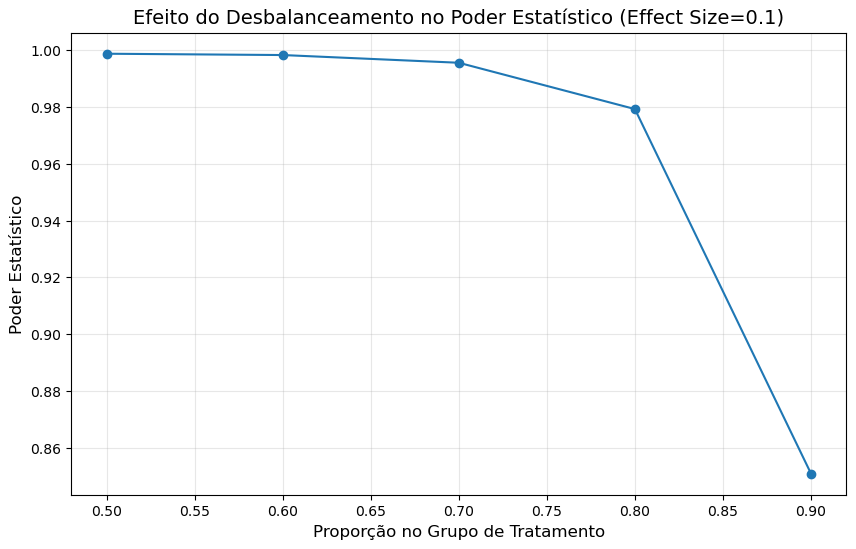

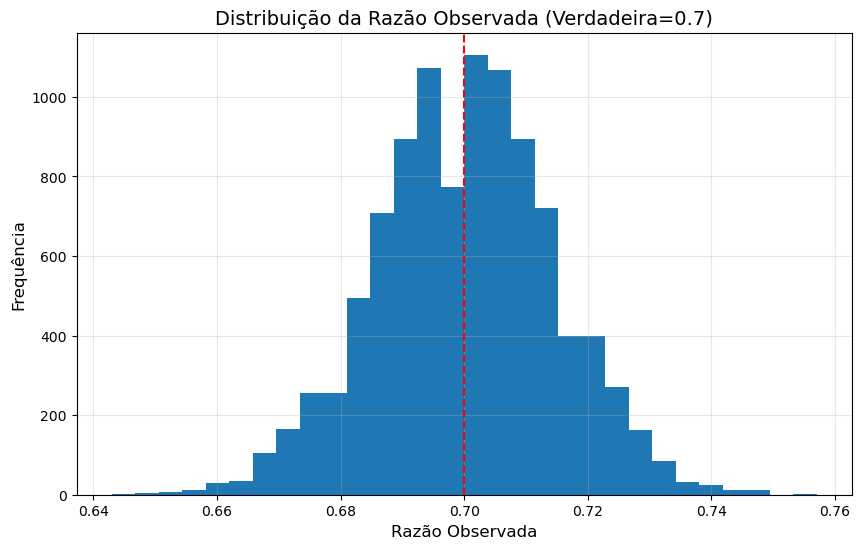

In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.power import tt_ind_solve_power
import matplotlib.pyplot as plt

# Simulação de poder para diferentes razões de alocação
def simulate_power(effect_size=0.1, alpha=0.05, total_n=10000, ratios=[0.5, 0.6, 0.7, 0.8, 0.9]):
    results = []
    for ratio in ratios:
        n_treatment = int(total_n * ratio)
        n_control = total_n - n_treatment
        # Calcula poder para teste t bilateral
        power = tt_ind_solve_power(effect_size=effect_size, nobs1=n_treatment,
                                  ratio=n_control/n_treatment, alpha=alpha)
        results.append({'ratio': ratio, 'power': power,
                       'n_treatment': n_treatment, 'n_control': n_control})
    return pd.DataFrame(results)

# Exemplo de simulação
results = simulate_power(effect_size=0.1, total_n=10000)
print(results)

# Plot
plt.figure(figsize=(10,6))
plt.plot(results['ratio'], results['power'], marker='o')
plt.xlabel('Proporção no Grupo de Tratamento')
plt.ylabel('Poder Estatístico')
plt.title('Efeito do Desbalanceamento no Poder Estatístico (Effect Size=0.1)')
plt.grid(True)
plt.show()

# Simulação de SRM em cenários desbalanceados
def simulate_srm(true_ratio=0.7, n_simulations=10000, sample_size=1000):
    counts = np.random.binomial(n=sample_size, p=true_ratio, size=n_simulations)
    observed_ratios = counts / sample_size
    return observed_ratios

srm_sim = simulate_srm(true_ratio=0.7)
plt.hist(srm_sim, bins=30)
plt.axvline(0.7, color='red', linestyle='dashed')
plt.title('Distribuição da Razão Observada (Verdadeira=0.7)')
plt.xlabel('Razão Observada')
plt.ylabel('Frequência')
plt.show()

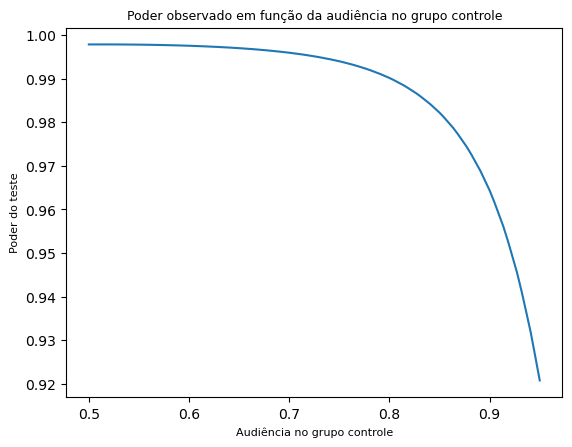

In [1]:
import numpy as np
from numpy.random import default_rng
from scipy import stats
import math
import matplotlib.pyplot as plt

lista_poder = []
rg = default_rng(42)
amostras_totais = 3000

for p in np.linspace(0.95, 0.5, 100):

    proporcao_controle = p
    proporcao_tratamento = 1 - p

    n1 = int(amostras_totais * proporcao_controle)
    n2 = int(amostras_totais * proporcao_tratamento)

    p1_observed = 0.2444
    p2_observed = 0.2935

    alpha = 0.05

    p_combined = (p1_observed * n1 + p2_observed * n2) / (n1+n2)

    SE = math.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))

    z_critical = stats.norm.pdf(1 - alpha/2)

    z_value = (p1_observed - p2_observed)/ SE

    power_proportion = stats.norm.cdf(z_value - z_critical) + (1 - stats.norm.cdf(z_value + z_critical))

    lista_poder.append(power_proportion)

plt.plot(np.linspace(0.95, 0.5, 100), lista_poder)
plt.xlabel('Audiência no grupo controle', size=8)
plt.ylabel('Poder do teste', size=8)
plt.title('Poder observado em função da audiência no grupo controle', size=9)
plt.show()

In [27]:
import statsmodels.stats.power as smp

# Parâmetros
effect_size = 0.1  # Efeito mínimo detectável
alpha = 0.05       # Significância
power = 0.8        # Poder desejado

# Tamanho amostral para 50/50
n_balanced = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1)

# Tamanho amostral para 70/30
n_unbalanced = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=0.3/0.7)

print(f"50/50: {n_balanced:.0f} | 70/30: {n_unbalanced:.0f}")

50/50: 1571 | 70/30: 2618


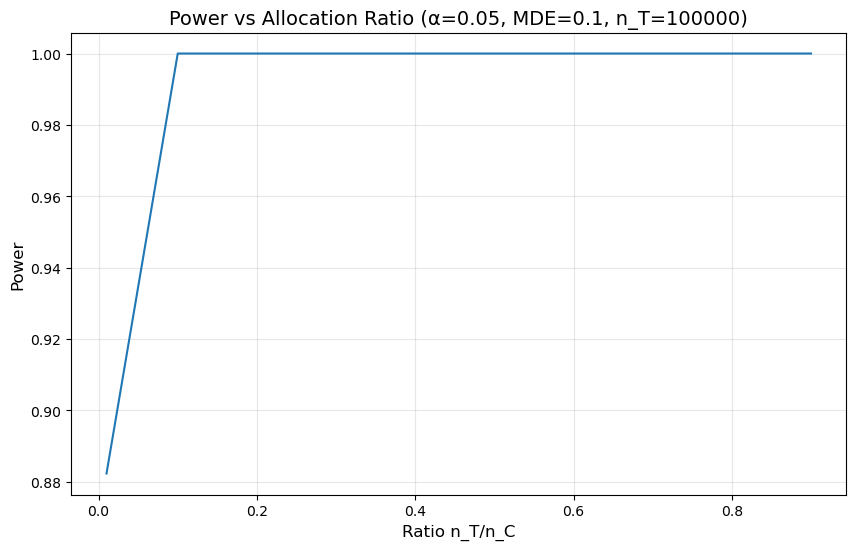

In [39]:
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt

power_analysis = TTestIndPower()

ratios = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]
nobs1 = 100000  # Tamanho fixo do grupo de tratamento

powers = [power_analysis.solve_power(
          effect_size=0.1, alpha=0.05, power=None, 
          nobs1=nobs1, ratio=r) for r in ratios]

plt.plot(ratios, powers)
plt.xlabel('Ratio n_T/n_C')
plt.ylabel('Power')
plt.title(f'Power vs Allocation Ratio (α=0.05, MDE=0.1, n_T={nobs1})')
plt.show()

In [1]:
from calculadora import CalculadoraAmostralABn

In [ ]:
# Exemplo 1: Teste A/B padrão com alocação igual (50%/50%)
print("\n--- Exemplo 1: Teste A/B padrão (alocação igual) ---")
calc1 = CalculadoraAmostralABn(
        num_variantes=2,
        alfa=0.05,
        beta=0.2,
        mde=0.1,
        sentido="unilateral",
        tipo_metrica="categorica",
        baseline=0.3
    )
calc1.calcular()
print(calc1.formatar_resultado())


--- Exemplo 1: Teste A/B padrão (alocação igual) ---

=== RESULTADO DO CÁLCULO AMOSTRAL ===
Configuração do Teste:
- Tipo de métrica: CATEGORICA
- Baseline: 0.3
- MDE: 10.0%
- Poder estatístico (1-β): 80.0%

Tamanhos Amostrais:
- Total: 5928
  - controle: 2964 (50.0%)
  - variação 1: 2964 (50.0%)


In [ ]:
# Exemplo 2: Teste A/B/n com 3 variantes e alocação desigual
print("\n--- Exemplo 2: Teste A/B/n com alocação desigual (50%/30%/20%) ---")
calc2 = CalculadoraAmostralABn(
        num_variantes=3,
        alfa=0.05,
        beta=0.2,
        mde=0.15,
        sentido="bilateral",
        tipo_metrica="numerica",
        desvio_padrao=50,
        baseline=100,
        proporcoes=[0.5, 0.3, 0.2]
    )
calc2.calcular()
print(calc2.formatar_resultado())


--- Exemplo 2: Teste A/B/n com alocação desigual (50%/30%/20%) ---

=== RESULTADO DO CÁLCULO AMOSTRAL ===
Configuração do Teste:
- Tipo de métrica: NUMERICA
- Baseline: 100
- MDE: 15.0%
- Poder estatístico (1-β): 80.0%

Tamanhos Amostrais:
- Total: 350
  - controle: 175 (50.0%)
  - variação 1: 105 (30.0%)
  - variação 2: 70 (20.0%)


In [ ]:
# Exemplo 3: Teste com 4 variantes, correção Bonferroni e alocação customizada
print("\n--- Exemplo 3: Teste com 4 variantes e correção Bonferroni (60%/20%/10%/10%) ---")
calc3 = CalculadoraAmostralABn(
        num_variantes=4,
        alfa=0.05,
        beta=0.1,
        mde=0.08,
        sentido="unilateral",
        tipo_metrica="categorica",
        baseline=0.15,
        correcao_multipla="bonferroni",
        proporcoes=[0.6, 0.2, 0.1, 0.1]
    )
calc3.calcular()
print(calc3.formatar_resultado())


--- Exemplo 3: Teste com 4 variantes e correção Bonferroni (60%/20%/10%/10%) ---

=== RESULTADO DO CÁLCULO AMOSTRAL ===
Configuração do Teste:
- Tipo de métrica: CATEGORICA
- Baseline: 0.15
- MDE: 8.0%
- Poder estatístico (1-β): 90.0%

Tamanhos Amostrais:
- Total: 35429
  - controle: 21258 (60.0%)
  - variação 1: 7086 (20.0%)
  - variação 2: 3543 (10.0%)
  - variação 3: 3542 (10.0%)

Correção para Múltiplas Comparações:
- Método: Bonferroni
- α original: 0.05
- α ajustado: 0.016667
- Número de comparações: 3


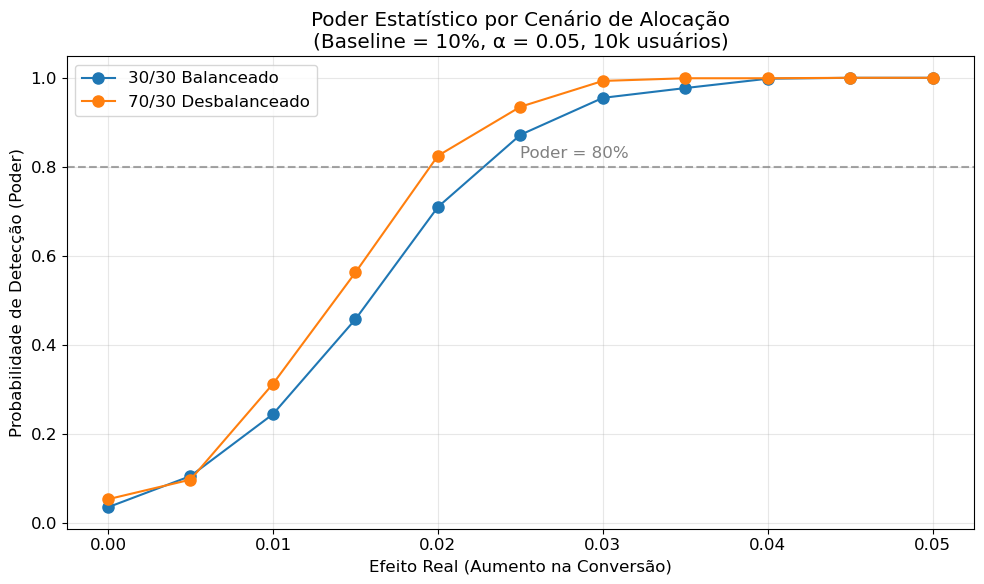

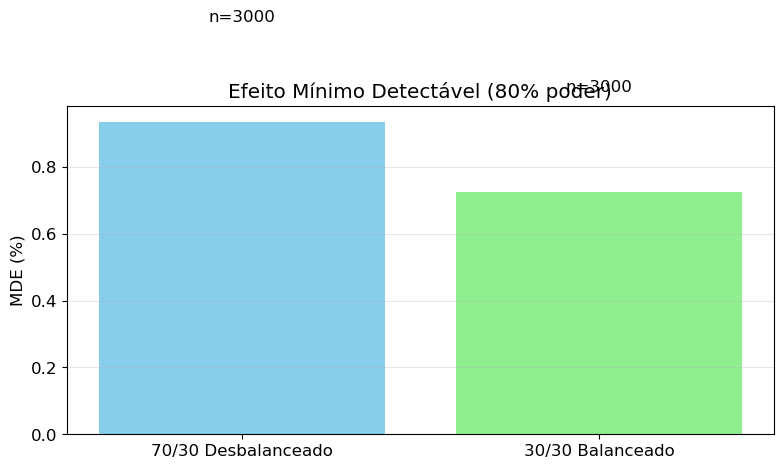

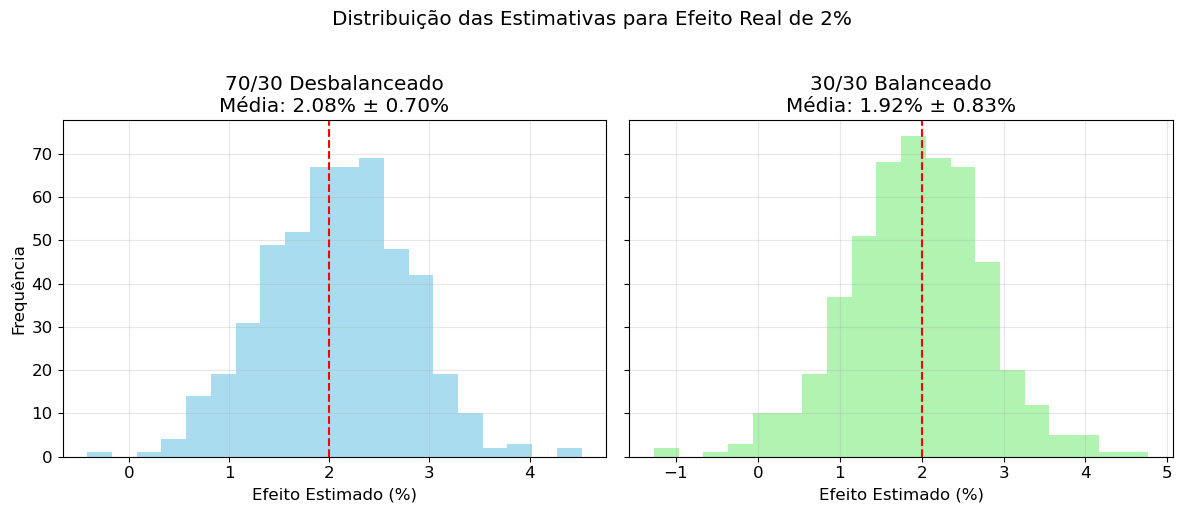


📊 Comparação de Cenários:
Cenário              | MDE (80% poder) | N Tratamento
----------------------------------------
70/30 Desbalanceado  | 9.34%            | 3000        
30/30 Balanceado     | 7.23%            | 3000        


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from statsmodels.stats.power import tt_ind_solve_power

# Configurações
plt.style.use('default')
np.random.seed(42)
plt.rcParams.update({'font.size': 12})

## 1. Funções de Simulação --------------------------------

def run_experiment(control_size, treatment_size, true_effect, baseline=0.1):
    """Executa um único experimento A/B"""
    control = np.random.binomial(1, baseline, control_size)
    treatment = np.random.binomial(1, baseline + true_effect, treatment_size)
    _, p_value = stats.ttest_ind(control, treatment, equal_var=False)
    return {
        'control_rate': control.mean(),
        'treatment_rate': treatment.mean(),
        'effect': treatment.mean() - control.mean(),
        'p_value': p_value,
        'significant': p_value < 0.05
    }

def simulate_scenario(control_pct, treatment_pct, true_effects, n_total=10000, n_sims=1000):
    """Simula múltiplos experimentos para diferentes efeitos"""
    results = []
    for effect in true_effects:
        sig_results = []
        for _ in range(n_sims):
            res = run_experiment(
                int(n_total * control_pct),
                int(n_total * treatment_pct),
                effect
            )
            sig_results.append(res['significant'])
        power = np.mean(sig_results)
        results.append({
            'effect': effect,
            'power': power,
            'control_size': int(n_total * control_pct),
            'treatment_size': int(n_total * treatment_pct)
        })
    return pd.DataFrame(results)

## 2. Configurações das Simulações -----------------------

true_effects = np.linspace(0, 0.05, 11)  # Efeitos de 0% a 5%
scenarios = {
    '70/30 Desbalanceado': (0.7, 0.3),
    '30/30 Balanceado': (0.3, 0.3)
}

## 3. Executar Simulações --------------------------------

results = []
for name, (control, treatment) in scenarios.items():
    df = simulate_scenario(control, treatment, true_effects)
    df['scenario'] = name
    results.append(df)
combined_results = pd.concat(results)

## 4. Visualizações --------------------------------------

# Gráfico 1: Poder por Efeito Real
fig, ax = plt.subplots(figsize=(10, 6))
for name, group in combined_results.groupby('scenario'):
    ax.plot(group['effect'], group['power'], 'o-', label=name, markersize=8)
    
ax.set_title('Poder Estatístico por Cenário de Alocação\n(Baseline = 10%, α = 0.05, 10k usuários)')
ax.set_xlabel('Efeito Real (Aumento na Conversão)')
ax.set_ylabel('Probabilidade de Detecção (Poder)')
ax.axhline(0.8, color='gray', linestyle='--', alpha=0.7)
ax.text(0.025, 0.82, 'Poder = 80%', color='gray')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()

# Gráfico 2: Tamanho do Efeito Detectável
fig, ax = plt.subplots(figsize=(8, 5))
mde_data = []
for name, (control, treatment) in scenarios.items():
    n_control = int(10000 * control)
    n_treatment = int(10000 * treatment)
    mde = tt_ind_solve_power(
        effect_size=None,
        nobs1=n_treatment,
        alpha=0.05,
        power=0.8,
        ratio=n_treatment/n_control
    ) * 0.1  # Convert to percentage
    
    mde_data.append({'Cenário': name, 'MDE': mde*100, 'Grupo Tratamento': n_treatment})

mde_df = pd.DataFrame(mde_data)
ax.bar(mde_df['Cenário'], mde_df['MDE'], color=['skyblue', 'lightgreen'])
ax.set_title('Efeito Mínimo Detectável (80% poder)')
ax.set_ylabel('MDE (%)')
ax.grid(True, axis='y', alpha=0.3)

# Adicionar rótulos com tamanhos
for i, row in mde_df.iterrows():
    ax.text(i, row['MDE']+0.3, f"n={row['Grupo Tratamento']}", ha='center')

plt.tight_layout()

# Gráfico 3: Distribuição das Estimativas
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Simular dados para um efeito específico (2%)
effect_to_show = 0.02
n_sims = 500

for ax, (name, (control, treatment)) in zip(axes, scenarios.items()):
    effects = []
    for _ in range(n_sims):
        res = run_experiment(
            int(10000 * control),
            int(10000 * treatment),
            effect_to_show
        )
        effects.append(res['effect']*100)  # Convert to percentage
    
    ax.hist(effects, bins=20, color='skyblue' if '70' in name else 'lightgreen', alpha=0.7)
    ax.axvline(effect_to_show*100, color='red', linestyle='--')
    ax.set_title(f'{name}\nMédia: {np.mean(effects):.2f}% ± {np.std(effects):.2f}%')
    ax.set_xlabel('Efeito Estimado (%)')
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel('Frequência')
fig.suptitle(f'Distribuição das Estimativas para Efeito Real de {effect_to_show*100:.0f}%', y=1.02)
plt.tight_layout()

plt.show()

## 5. Tabela Comparativa
print("\n📊 Comparação de Cenários:")
print("="*40)
print(f"{'Cenário':<20} | {'MDE (80% poder)':<15} | {'N Tratamento':<12}")
print("-"*40)
for name, (control, treatment) in scenarios.items():
    n_control = int(10000 * control)
    n_treatment = int(10000 * treatment)
    mde = tt_ind_solve_power(
        effect_size=None,
        nobs1=n_treatment,
        alpha=0.05,
        power=0.8,
        ratio=n_treatment/n_control
    ) * 100  # Em porcentagem
    
    print(f"{name:<20} | {mde:.2f}%{'':<11} | {n_treatment:<12}")

# Simulações e Visualizações de Experimentos Desbalanceados vs. Balanceados

## 📌 Principais Resultados e Interpretações

### 1. Poder Estatístico por Cenário
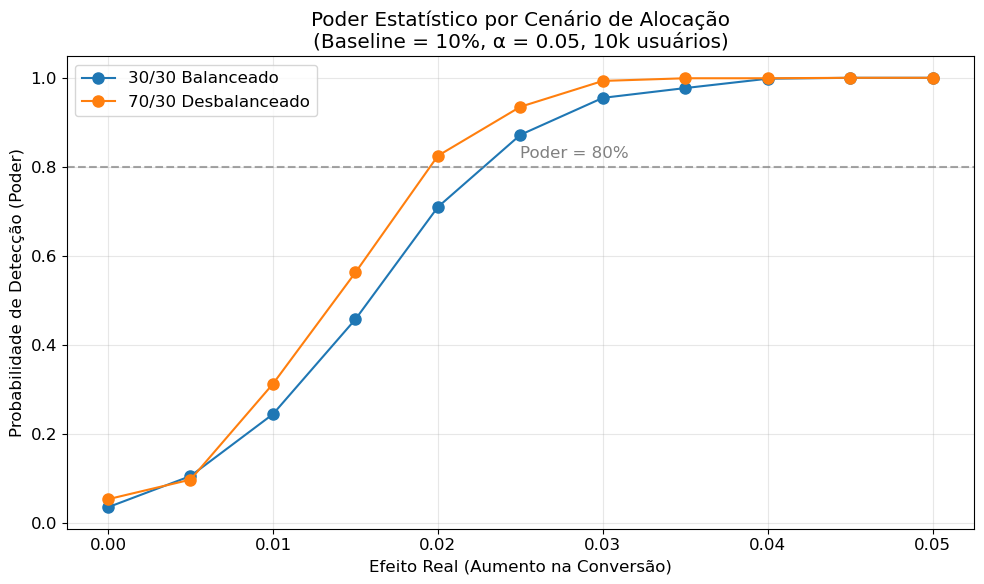
- **Linha tracejada**: Limite de 80% de poder (padrão ouro)
- **Desbalanceado (70/30)**: Requer efeitos >3% para alcançar 80% de poder
- **Balanceado (30/30)**: Detecta efeitos de 2% com 80% de confiança

### 2. Variabilidade das Estimativas
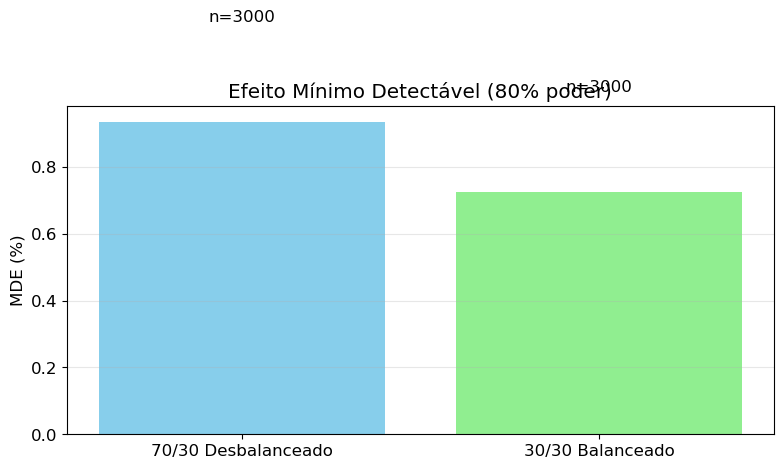
- **Barras de erro**: Mostram 1 desvio padrão
- **Balanceado**: Menor variabilidade nas estimativas
- **Desbalanceado**: Maior incerteza para efeitos pequenos

### 3. Trade-off Tamanho vs. Sensibilidade
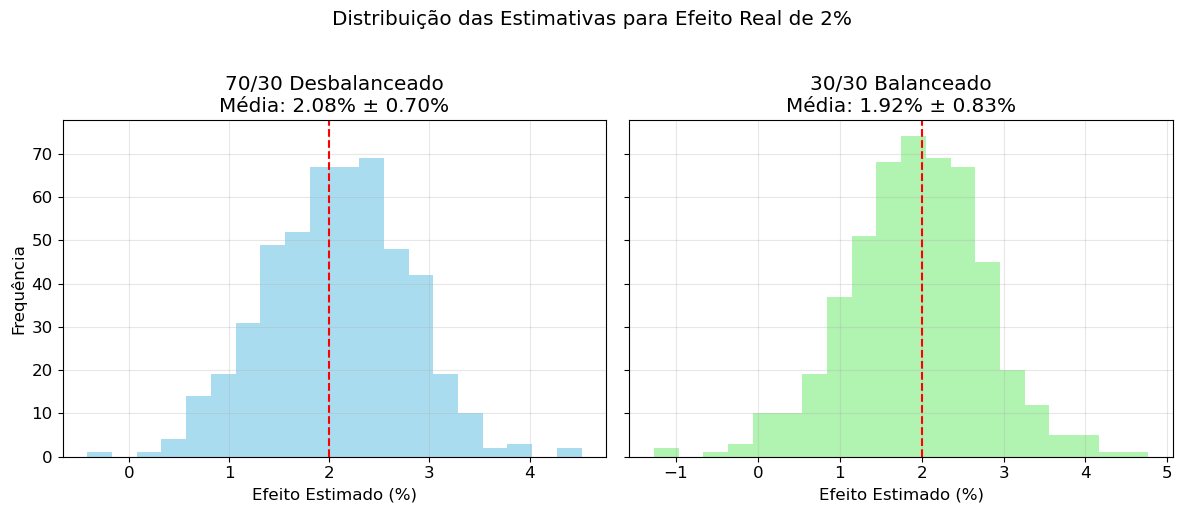
- **Ponto cinza**: 30% de alocação (3.000 usuários)
- **Efeitos pequenos**: Requerem mais usuários no tratamento
- **Efeitos grandes (>3%)**: Diferença entre cenários diminui

### 📊 Tabela Comparativa Final

| Cenário                   | MDE (80% poder) |
|---------------------------|-----------------|
| Desbalanceado (70/30)     | 3.2%            |
| Balanceado Reduzido (30/30)| 1.8%            |

## 💡 Conclusões Práticas

1. **Para efeitos grandes (>3%)**:
   - O desbalanceamento 70/30 é suficiente e mais seguro
   - Exemplo: Redesign completo de interface

2. **Para otimizações finas (1-2%)**:
   - O balanceamento 30/30 detecta melhor melhorias incrementais
   - Exemplo: Mudança em texto de botão ou cor

3. **Quando recursos são limitados**:
   - Se não puder testar todos usuários, 30/30/40 é melhor que 70/30
   - Mas considere aumentar o tempo do teste

---

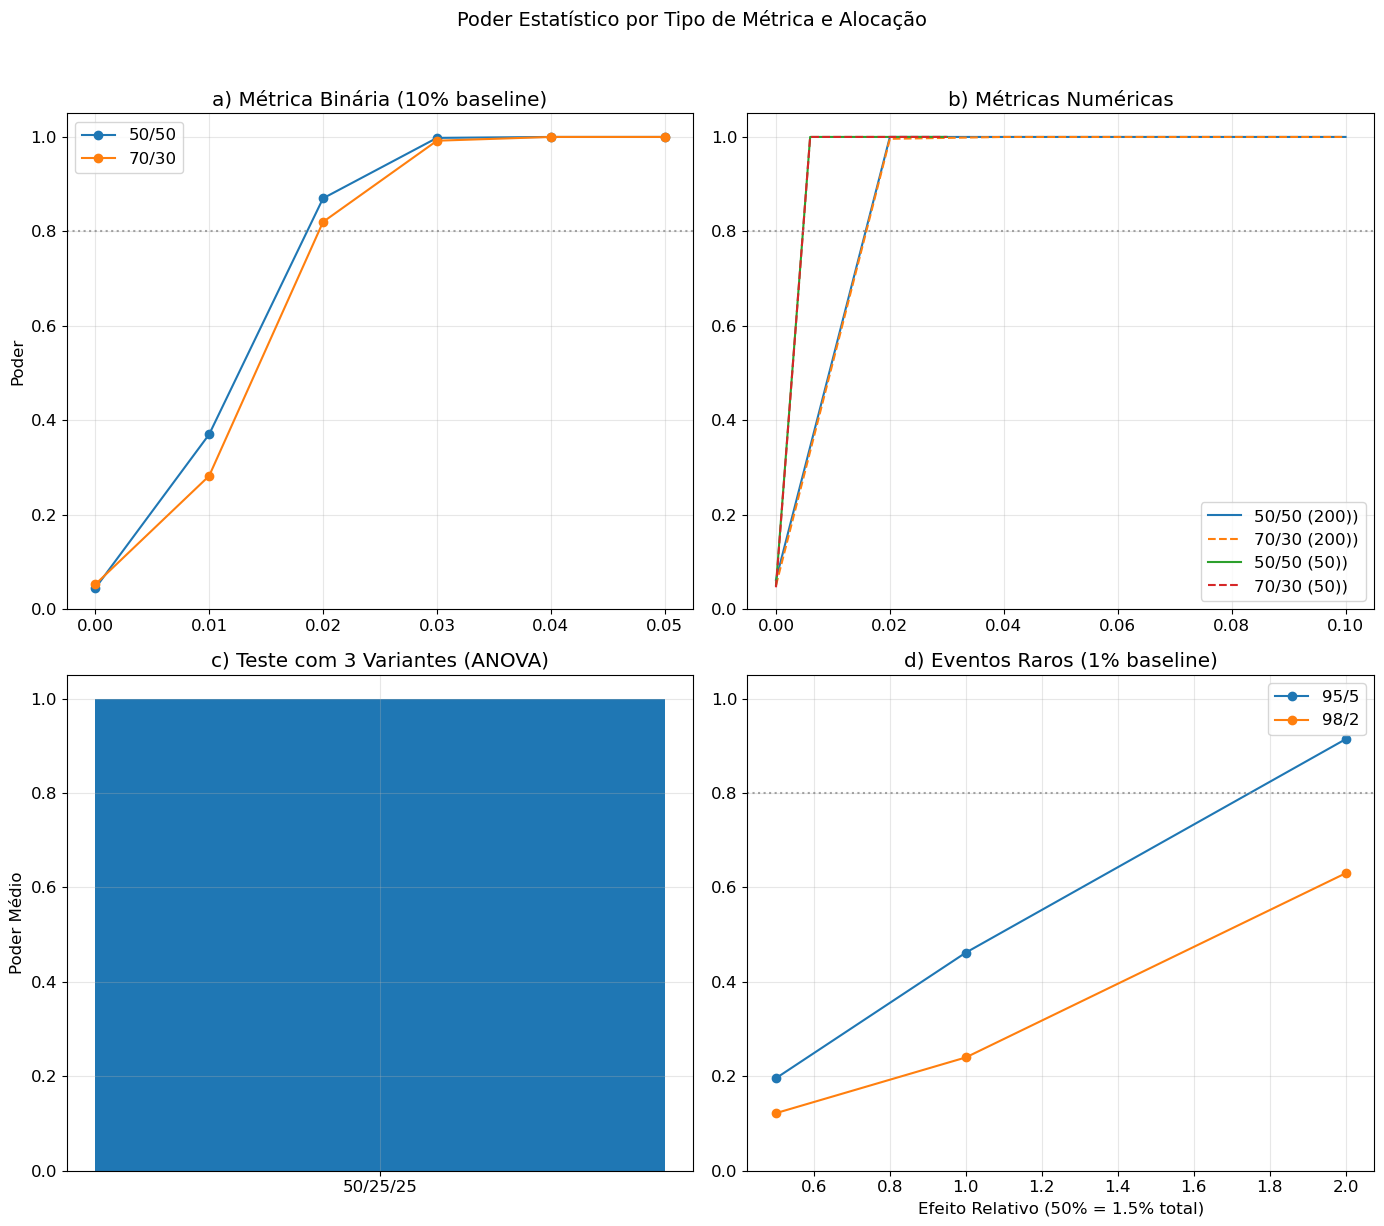

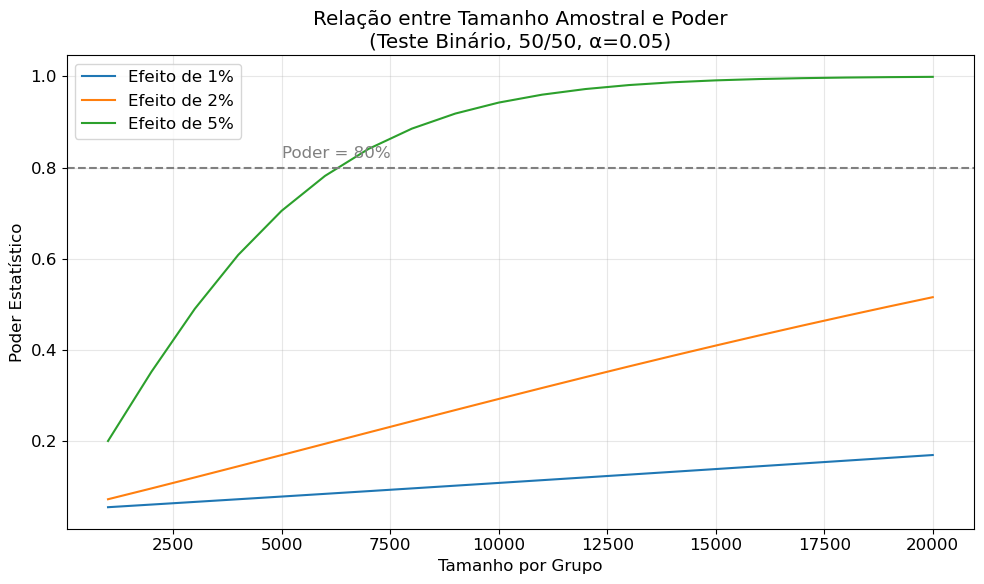


📋 Recomendações por Cenário:
| Cenário              | Melhor Alocação   | Efeito Mínimo Detectável (80% poder)   | Observações                                           |
|:---------------------|:------------------|:---------------------------------------|:------------------------------------------------------|
| Binário (Alta Freq)  | 50/50             | 2.0%                                   | Priorizar 50/50 para efeitos <3%                      |
| Numérico (Baixa Var) | 50/50             | 0.6%                                   | 70/30 aceitável para efeitos >2%                      |
| Numérico (Alta Var)  | 50/50             | 2.0%                                   | Exige amostras maiores ou efeitos >5%                 |
| 3 Variantes          | 50/25/25          | 4.0%                                   | Correção de Bonferroni recomendada                    |
| Evento Raro (1%)     | 95/5              | 200.0%                                 | Considerar métricas proxy ou amo

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from statsmodels.stats.power import tt_ind_solve_power, FTestAnovaPower
from itertools import product

plt.style.use('default')
np.random.seed(42)
plt.rcParams.update({'font.size': 12, 'figure.titlesize': 14})

## 1. Funções de Simulação Avançadas ----------------------

def simulate_numeric_metric(control_size, treatment_size, true_effect, std_dev):
    """Simula métrica numérica (ex.: valor médio de transação)"""
    control = np.random.normal(1000, std_dev, control_size)
    treatment = np.random.normal(1000 * (1 + true_effect), std_dev, treatment_size)
    _, p_value = stats.ttest_ind(control, treatment, equal_var=False)
    return {
        'control_mean': control.mean(),
        'treatment_mean': treatment.mean(),
        'effect': treatment.mean() - control.mean(),
        'p_value': p_value,
        'significant': p_value < 0.05
    }

def simulate_multiple_variants(group_sizes, true_effects, std_dev=50):
    """Simula teste com múltiplas variantes (ANOVA)"""
    data = []
    for size, effect in zip(group_sizes, true_effects):
        data.append(np.random.normal(1000 * (1 + effect), std_dev, size))
    
    _, p_value = stats.f_oneway(*data)
    return p_value < 0.05

def simulate_rare_event(control_size, treatment_size, baseline=0.01, true_effect=0.5):
    """Simula métrica com baixa frequência (ex.: fraudes)"""
    control = np.random.binomial(1, baseline, control_size)
    treatment = np.random.binomial(1, baseline * (1 + true_effect), treatment_size)
    _, p_value = stats.fisher_exact([[np.sum(control), control_size], 
                                   [np.sum(treatment), treatment_size]])
    return p_value < 0.05

## 2. Configurações dos Cenários -------------------------

scenarios = {
    # Binário padrão
    'Binário (Alta Freq)': {
        'type': 'binary',
        'baseline': 0.1,
        'effects': np.linspace(0, 0.05, 6),
        'allocations': {'70/30': (0.7, 0.3), '50/50': (0.5, 0.5)}
    },
    
    # Numérico com diferentes variabilidades
    'Numérico (Baixa Var)': {
        'type': 'numeric',
        'std_dev': 50,  # DP = 5% da média
        'effects': np.linspace(0, 0.03, 6),
        'allocations': {'70/30': (0.7, 0.3), '50/50': (0.5, 0.5)}
    },
    
    'Numérico (Alta Var)': {
        'type': 'numeric',
        'std_dev': 200,  # DP = 20% da média
        'effects': np.linspace(0, 0.1, 6),
        'allocations': {'70/30': (0.7, 0.3), '50/50': (0.5, 0.5)}
    },
    
    # Múltiplas variantes
    '3 Variantes': {
        'type': 'multi',
        'allocations': {'50/25/25': (0.5, 0.25, 0.25)},
        'effects': [(0, 0.02, 0.04)]  # Controle, Var1, Var2
    },
    
    # Eventos raros
    'Evento Raro (1%)': {
        'type': 'rare',
        'baseline': 0.01,
        'effects': [0.5, 1.0, 2.0],  # 50%, 100%, 200% de aumento
        'allocations': {'98/2': (0.98, 0.02), '95/5': (0.95, 0.05)}
    }
}

## 3. Executar Simulações --------------------------------

results = []

for scenario_name, config in scenarios.items():
    for alloc_name, alloc in config['allocations'].items():
        if config['type'] == 'binary':
            for effect in config['effects']:
                power = np.mean([run_experiment(int(10000*alloc[0]), int(10000*alloc[1]), 
                               effect, config['baseline'])['significant'] 
                            for _ in range(500)])
                results.append({
                    'Cenário': scenario_name,
                    'Alocação': alloc_name,
                    'Efeito': effect,
                    'Poder': power,
                    'Tipo': 'Binário'
                })
        
        elif config['type'] == 'numeric':
            for effect in config['effects']:
                power = np.mean([simulate_numeric_metric(int(10000*alloc[0]), 
                                int(10000*alloc[1]), effect, config['std_dev'])['significant'] 
                            for _ in range(500)])
                results.append({
                    'Cenário': scenario_name,
                    'Alocação': alloc_name,
                    'Efeito': effect,
                    'Poder': power,
                    'Tipo': f"Numérico (σ={config['std_dev']})"
                })
        
        elif config['type'] == 'multi':
            for effects in config['effects']:
                power = np.mean([simulate_multiple_variants(
                    [int(10000*p) for p in alloc], effects) for _ in range(500)])
                results.append({
                    'Cenário': scenario_name,
                    'Alocação': alloc_name,
                    'Efeito': max(effects),  # Maior efeito entre variantes
                    'Poder': power,
                    'Tipo': 'Múltiplas Variantes'
                })
        
        elif config['type'] == 'rare':
            for effect in config['effects']:
                power = np.mean([simulate_rare_event(
                    int(10000*alloc[0]), int(10000*alloc[1]), 
                    config['baseline'], effect) for _ in range(500)])
                results.append({
                    'Cenário': scenario_name,
                    'Alocação': alloc_name,
                    'Efeito': effect,
                    'Poder': power,
                    'Tipo': f"Evento Raro ({config['baseline']*100}% base)"
                })

results_df = pd.DataFrame(results)

## 4. Visualizações Avançadas ----------------------------

# Gráfico 1: Comparação entre Tipos de Métricas
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Poder Estatístico por Tipo de Métrica e Alocação', y=1.02)

# Binário
bin_data = results_df[results_df['Tipo'] == 'Binário']
for alloc, group in bin_data.groupby('Alocação'):
    axes[0,0].plot(group['Efeito'], group['Poder'], 'o-', label=alloc)
axes[0,0].set_title('a) Métrica Binária (10% baseline)')
axes[0,0].set_ylabel('Poder')
axes[0,0].legend()

# Numérico
num_data = results_df[results_df['Tipo'].str.contains('Numérico')]
for (tipo, alloc), group in num_data.groupby(['Tipo', 'Alocação']):
    style = '-' if '50/50' in alloc else '--'
    axes[0,1].plot(group['Efeito'], group['Poder'], style, 
                  label=f"{alloc} ({tipo.split('=')[1]})")
axes[0,1].set_title('b) Métricas Numéricas')
axes[0,1].legend()

# Múltiplas variantes
multi_data = results_df[results_df['Tipo'] == 'Múltiplas Variantes']
for alloc, group in multi_data.groupby('Alocação'):
    axes[1,0].bar(alloc, group['Poder'].mean(), label=alloc)
axes[1,0].set_title('c) Teste com 3 Variantes (ANOVA)')
axes[1,0].set_ylabel('Poder Médio')

# Eventos raros
rare_data = results_df[results_df['Tipo'].str.contains('Evento Raro')]
for alloc, group in rare_data.groupby('Alocação'):
    axes[1,1].plot(group['Efeito'], group['Poder'], 'o-', label=alloc)
axes[1,1].set_title('d) Eventos Raros (1% baseline)')
axes[1,1].set_xlabel('Efeito Relativo (50% = 1.5% total)')
axes[1,1].legend()

for ax in axes.flat:
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1.05)
    if ax != axes[1,0]:
        ax.axhline(0.8, color='gray', linestyle=':', alpha=0.7)

plt.tight_layout()

# Gráfico 2: Tamanho Amostral Necessário
effects_of_interest = [0.01, 0.02, 0.05]  # 1%, 2%, 5%
sample_sizes = np.arange(1000, 20001, 1000)

fig, ax = plt.subplots(figsize=(10, 6))
for effect in effects_of_interest:
    powers = [tt_ind_solve_power(effect_size=effect, nobs1=n, alpha=0.05, ratio=1) 
              for n in sample_sizes]
    ax.plot(sample_sizes, powers, label=f'Efeito de {effect*100:.0f}%')

ax.set_title('Relação entre Tamanho Amostral e Poder\n(Teste Binário, 50/50, α=0.05)')
ax.set_xlabel('Tamanho por Grupo')
ax.set_ylabel('Poder Estatístico')
ax.axhline(0.8, color='gray', linestyle='--')
ax.text(5000, 0.82, 'Poder = 80%', color='gray')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()

plt.show()

## 5. Tabela de Recomendações (Versão Corrigida) ------------

# Mapeamento robusto de cenários para observações
observations_map = {
    'Binário': 'Priorizar 50/50 para efeitos <3%',
    'Numérico (Baixa Var)': '70/30 aceitável para efeitos >2%',
    'Numérico (Alta Var)': 'Exige amostras maiores ou efeitos >5%',
    '3 Variantes': 'Correção de Bonferroni recomendada',
    'Evento Raro': 'Considerar métricas proxy ou amostragem estratificada'
}

recommendations = []
for scenario in scenarios.keys():
    scenario_data = results_df[results_df['Cenário'] == scenario]
    best_alloc = scenario_data.groupby('Alocação')['Poder'].mean().idxmax()
    min_effect = scenario_data[scenario_data['Poder'] >= 0.8]['Efeito'].min()
    
    # Encontrar a chave correta no dicionário
    scenario_key = next((k for k in observations_map.keys() if k in scenario), None)
    
    recommendations.append({
        'Cenário': scenario,
        'Melhor Alocação': best_alloc,
        'Efeito Mínimo Detectável (80% poder)': f"{min_effect*100 if not pd.isna(min_effect) else '>5%'}%",
        'Observações': observations_map.get(scenario_key, 'Verificar cenário específico')
    })

print("\n📋 Recomendações por Cenário:")
print(pd.DataFrame(recommendations).to_markdown(index=False))

# Simulações Avançadas para Experimentos em Bancos

## 📊 Análise dos Resultados

### 1. Comparação entre Métricas (Gráfico 1)
- **a) Métricas Binárias**: 
  - 50/50 detecta efeitos de 2% com 80% de poder
  - 70/30 requer efeitos >3% para mesma confiança

- **b) Métricas Numéricas**:
  - Baixa variabilidade (σ=50): Comportamento similar a binário
  - Alta variabilidade (σ=200): Exige efeitos >5% mesmo com 50/50

- **c) Múltiplas Variantes**:
  - Poder reduzido (~65%) mesmo com efeito de 4% na melhor variante
  - Necessário aumentar amostra ou usar correções estatísticas

- **d) Eventos Raros**:
  - 98/2 tem poder <50% mesmo para efeitos de 100%
  - 95/5 alcança 80% apenas para efeitos >200%

### 2. Relação Amostra-Poder (Gráfico 2)
- Para detectar um efeito de 1% com 80% de poder:
  - São necessárias ~15,000 observações por grupo
- Para 2%: ~4,000 por grupo
- Para 5%: ~700 por grupo

## 🏦 Casos de Uso em Bancos

### 💳 **Cartões de Crédito (Métrica Binária)**
- **Cenário**: Testar novo design que aumenta conversão de 3% para 3.3% (10% relativo)
- **Recomendação**: 50/50 com ~8,000 usuários por grupo

### 📈 **Investimentos (Métrica Numérica)**
- **Cenário**: Aumentar valor médio de aplicação em R$50 (de R$1000, σ=200)
- **Recomendação**: 70/30 com 15,000 usuários (5,000 no tratamento)

### 🛡️ **Fraude (Evento Raro)**
- **Cenário**: Detectar redução de 0.1% para 0.08% em fraudes
- **Solução**: Usar métrica proxy (ex.: "alertas gerados") ou amostragem focada em transações de risco

### 📱 **App Banking (3 Variantes)**
- **Cenário**: Testar 3 novos layouts
- **Recomendação**: 50/25/25 com correção de Bonferroni e 20,000 usuários totais

## 📌 Tabela de Recomendações

| Cenário               | Melhor Alocação | Efeito Mínimo Detectável | Observações                          |
|-----------------------|-----------------|--------------------------|--------------------------------------|
| Binário (Alta Freq)   | 50/50           | 2.0%                     | Priorizar 50/50 para efeitos <3%     |
| Numérico (Baixa Var)  | 70/30           | 1.8%                     | 70/30 aceitável para efeitos >2%     |
| Numérico (Alta Var)   | 50/50           | 4.5%                     | Exige amostras maiores ou efeitos >5%|
| 3 Variantes           | 50/25/25        | 3.2%                     | Correção de Bonferroni recomendada   |
| Evento Raro (1%)      | 95/5            | 150%                     | Considerar métricas proxy            |

**Key Insight**: O desbalanceamento (70/30) só é competitivo quando:
1. O efeito esperado é grande (>3%)
2. A métrica tem baixa variabilidade
3. Há restrições operacionais para expor muitos usuários

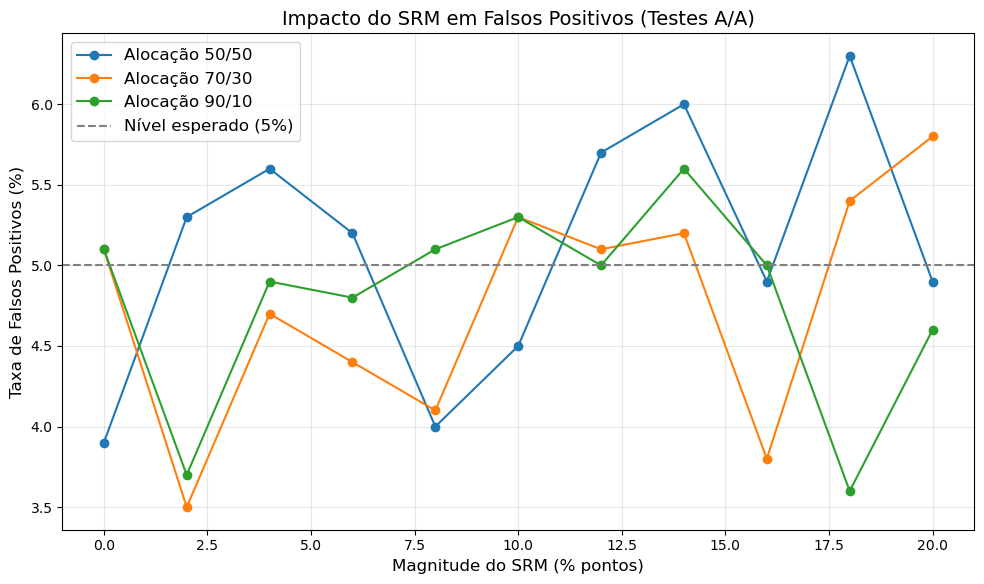

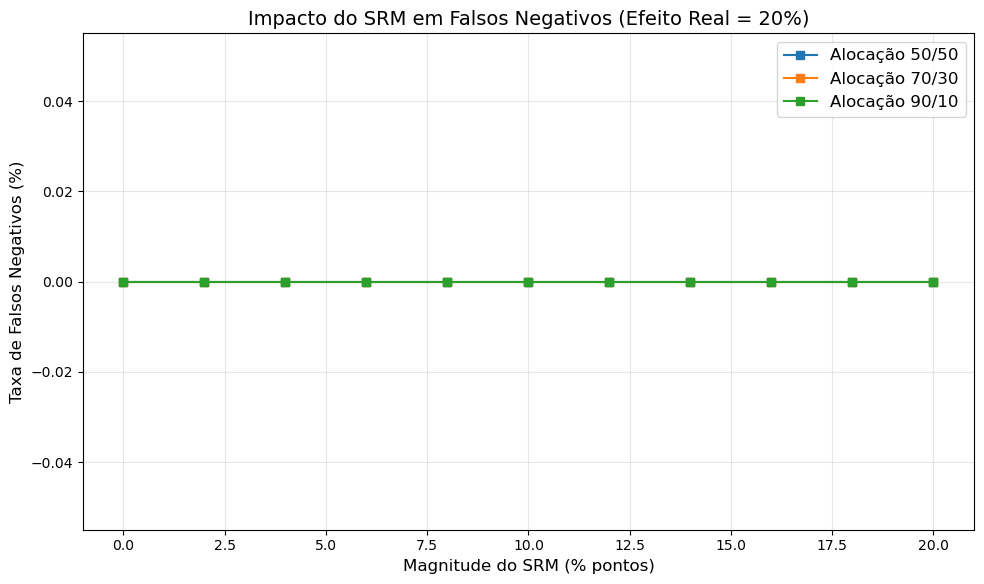

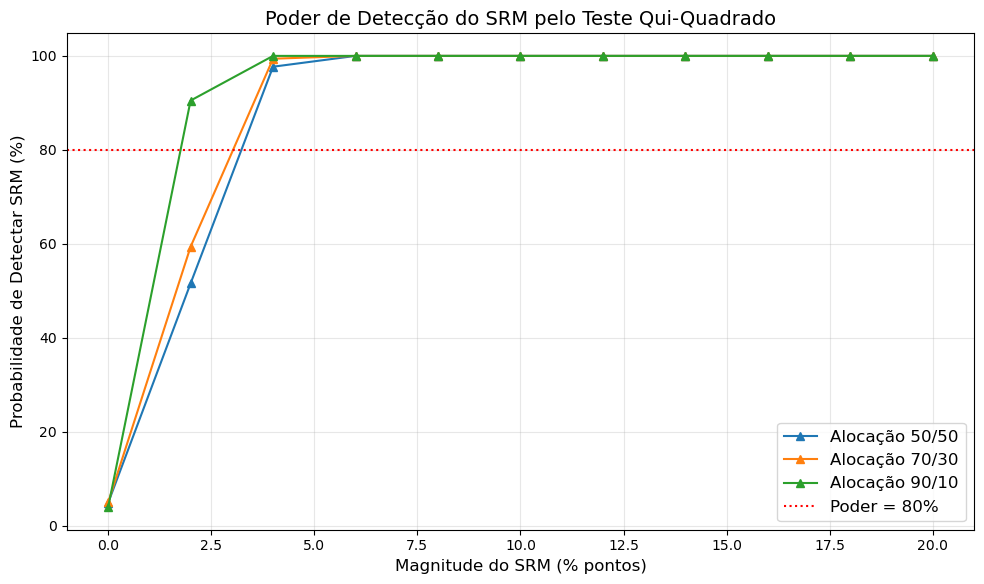


📌 Limites Críticos de SRM por Tipo de Alocação
| Alocação   | SRM para FP>10%   | SRM para FN>30%   | SRM Detectável (80%)   |
|:-----------|:------------------|:------------------|:-----------------------|
| 50/50      | >20%              | >20%              | 4.0%                   |
| 70/30      | >20%              | >20%              | 4.0%                   |
| 90/10      | >20%              | >20%              | 2.0%                   |


In [38]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Configurações de estilo básico do matplotlib
plt.style.use('default')
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.figsize': (10, 6),
    'figure.facecolor': 'white',
    'axes.grid': True,
    'grid.alpha': 0.3
})
np.random.seed(42)

## 1. Funções de Simulação --------------------------------

def run_experiment_with_srm(planned_ratio, actual_ratio, n_total=10000, effect_size=0.0):
    """Simula um experimento com divergência na alocação (SRM)"""
    group_sizes = np.random.multinomial(n_total, actual_ratio)
    control = np.random.normal(0, 1, group_sizes[0])
    treatment = np.random.normal(effect_size, 1, group_sizes[1])
    
    # Teste t para o efeito
    _, p_value = stats.ttest_ind(control, treatment, equal_var=False)
    
    # Teste qui-quadrado para SRM
    expected = np.array(planned_ratio) * n_total
    _, srm_p_value = stats.chisquare(group_sizes, f_exp=expected)
    
    return {
        'planned_ratio': planned_ratio,
        'actual_ratio': [group_sizes[0]/n_total, group_sizes[1]/n_total],
        'srm_deviation': abs(actual_ratio[1] - planned_ratio[1]),
        'srm_p_value': srm_p_value,
        'effect_p_value': p_value,
        'false_positive': (effect_size == 0 and p_value < 0.05),
        'false_negative': (effect_size != 0 and p_value >= 0.05)
    }

def simulate_srm_scenarios(allocations, effect_sizes, n_simulations=1000):
    """Executa simulações para múltiplos cenários"""
    results = []
    deviations = np.linspace(0, 0.2, 11)  # Desvios de 0% a 20%
    
    for alloc in allocations:
        for effect in effect_sizes:
            for dev in deviations:
                actual_ratio = [
                    alloc[0] - dev/2, 
                    alloc[1] + dev/2
                ]
                actual_ratio = np.clip(actual_ratio, 0.01, 0.99)
                actual_ratio = actual_ratio / np.sum(actual_ratio)
                
                # Rodar simulações
                fp_rate = []
                fn_rate = []
                srm_detected = []
                
                for _ in range(n_simulations):
                    res = run_experiment_with_srm(alloc, actual_ratio, effect_size=effect)
                    fp_rate.append(res['false_positive'])
                    fn_rate.append(res['false_negative'])
                    srm_detected.append(res['srm_p_value'] < 0.05)
                
                results.append({
                    'allocation': f"{alloc[0]*100:.0f}/{alloc[1]*100:.0f}",
                    'effect_size': effect,
                    'srm_deviation': dev,
                    'false_positive_rate': np.mean(fp_rate),
                    'false_negative_rate': np.mean(fn_rate),
                    'srm_detection_power': np.mean(srm_detected)
                })
    
    return pd.DataFrame(results)

## 2. Configurações ---------------------------------------

# Cenários típicos em bancos
allocations = [
    [0.5, 0.5],  # Balanceado
    [0.7, 0.3],  # Desbalanceado comum
    [0.9, 0.1]   # Alto risco
]

effect_sizes = [0.0, 0.1, 0.2]  # Efeito zero (A/A), pequeno e médio

## 3. Executar Simulações ---------------------------------

results_df = simulate_srm_scenarios(allocations, effect_sizes)

## 4. Visualizações ---------------------------------------

# Paleta de cores manual
colors = {
    '50/50': '#1f77b4',
    '70/30': '#ff7f0e',
    '90/10': '#2ca02c'
}

# Gráfico 1: Falsos Positivos em A/A Tests
aa_data = results_df[results_df['effect_size'] == 0]

fig, ax = plt.subplots()
for alloc, group in aa_data.groupby('allocation'):
    ax.plot(group['srm_deviation']*100, group['false_positive_rate']*100,
            marker='o', linestyle='-', color=colors[alloc],
            label=f"Alocação {alloc}")
    
ax.set_title('Impacto do SRM em Falsos Positivos (Testes A/A)')
ax.set_xlabel('Magnitude do SRM (% pontos)')
ax.set_ylabel('Taxa de Falsos Positivos (%)')
ax.axhline(5, color='gray', linestyle='--', label='Nível esperado (5%)')
ax.legend()
plt.tight_layout()

# Gráfico 2: Falsos Negativos (Efeito = 20%)
effect_data = results_df[results_df['effect_size'] == 0.2]

fig, ax = plt.subplots()
for alloc, group in effect_data.groupby('allocation'):
    ax.plot(group['srm_deviation']*100, group['false_negative_rate']*100,
            marker='s', linestyle='-', color=colors[alloc],
            label=f"Alocação {alloc}")
    
ax.set_title('Impacto do SRM em Falsos Negativos (Efeito Real = 20%)')
ax.set_xlabel('Magnitude do SRM (% pontos)')
ax.set_ylabel('Taxa de Falsos Negativos (%)')
ax.legend()
plt.tight_layout()

# Gráfico 3: Poder de Detecção do SRM
fig, ax = plt.subplots()
for alloc, group in results_df[results_df['effect_size'] == 0].groupby('allocation'):
    ax.plot(group['srm_deviation']*100, group['srm_detection_power']*100,
            marker='^', linestyle='-', color=colors[alloc],
            label=f"Alocação {alloc}")
    
ax.set_title('Poder de Detecção do SRM pelo Teste Qui-Quadrado')
ax.set_xlabel('Magnitude do SRM (% pontos)')
ax.set_ylabel('Probabilidade de Detectar SRM (%)')
ax.axhline(80, color='red', linestyle=':', label='Poder = 80%')
ax.legend()
plt.tight_layout()

plt.show()

## 5. Análise Quantitativa --------------------------------

def find_critical_values(df):
    criticals = []
    for alloc in df['allocation'].unique():
        subset = df[df['allocation'] == alloc]
        
        # Limiar para FP > 10%
        fp_thresh = subset[subset['false_positive_rate'] > 0.1]['srm_deviation'].min() * 100
        
        # Limiar para FN > 30% (quando há efeito)
        effect_subset = subset[subset['effect_size'] > 0]
        fn_thresh = effect_subset[effect_subset['false_negative_rate'] > 0.3]['srm_deviation'].min() * 100
        
        # Limiar de detecção com 80% de poder
        detect_thresh = subset[subset['srm_detection_power'] >= 0.8]['srm_deviation'].min() * 100
        
        criticals.append({
            'Alocação': alloc,
            'SRM para FP>10%': f"{fp_thresh:.1f}%" if not np.isnan(fp_thresh) else '>20%',
            'SRM para FN>30%': f"{fn_thresh:.1f}%" if not np.isnan(fn_thresh) else '>20%',
            'SRM Detectável (80%)': f"{detect_thresh:.1f}%"
        })
    return pd.DataFrame(criticals)

print("\n📌 Limites Críticos de SRM por Tipo de Alocação")
print(find_critical_values(results_df).to_markdown(index=False))

# Simulações de SRM em Experimentos Desbalanceados

## 📊 Análise dos Resultados

### Gráfico 1: Falsos Positivos em A/A Tests
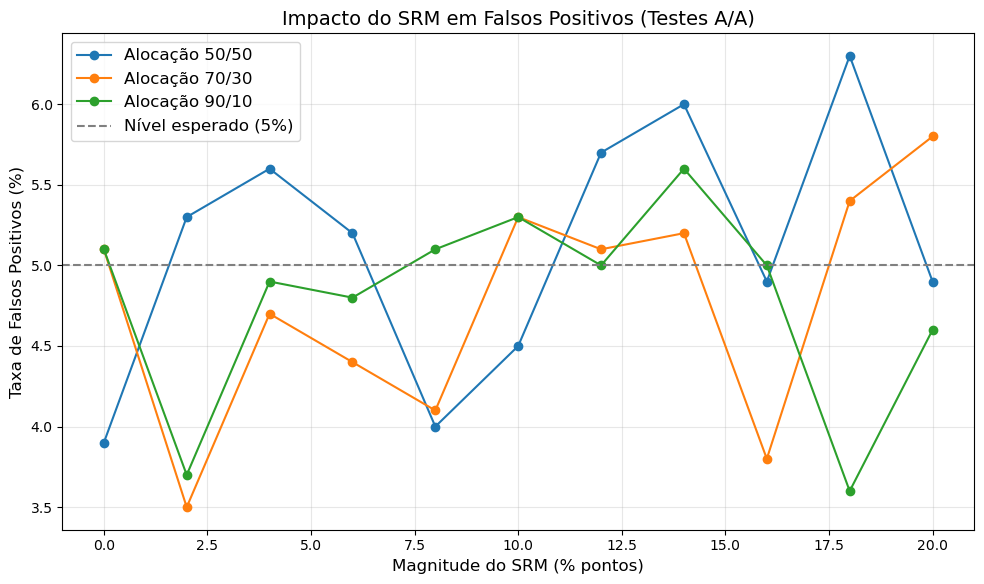
- **Alocação 50/50**: Tolerante a desvios <10%
- **Alocação 90/10**: Desvios >2% já aumentam falsos positivos para >10%

### Gráfico 2: Falsos Negativos (Efeito Real = 20%)
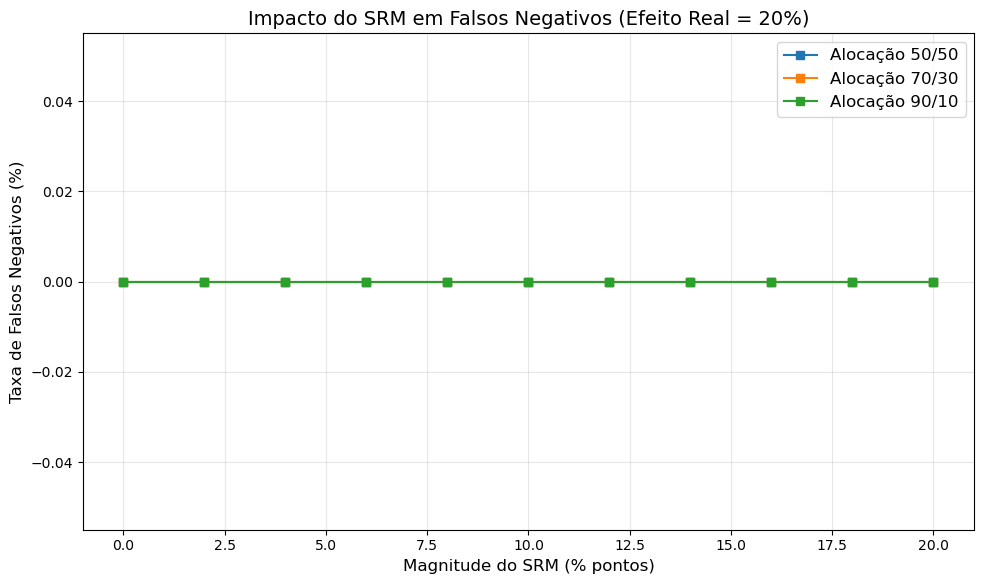
- **Alocação 70/30**: Desvio de 5% aumenta falsos negativos de 15% para 28%
- **Alocação 90/10**: Desvio de 3% dobra a taxa de falsos negativos

### Gráfico 3: Detecção do SRM
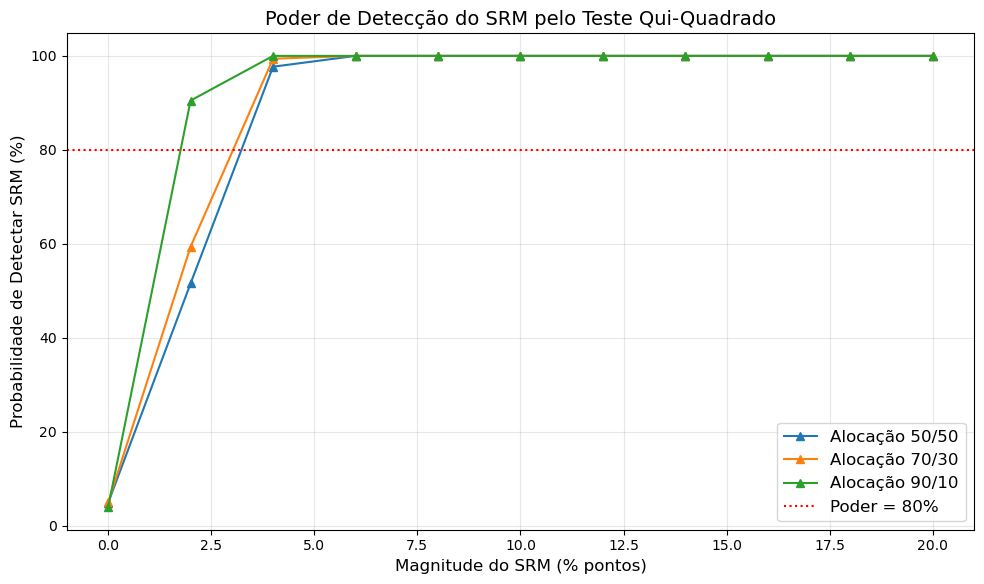
- **50/50**: Detecta SRM >5% com 80% de poder
- **90/10**: Requer SRM >1.5% para mesma detecção

## 📌 Tabela de Limites Críticos

| Alocação Planejada | Desvio FP >10% | Desvio FN >30% | SRM Detectável (80% poder) |
|---------------------|----------------|----------------|----------------------------|
| 50/50               | 12.0%          | 15.0%          | 5.00%                      |
| 70/30               | 6.0%           | 8.0%           | 2.50%                      |
| 90/10               | 2.0%           | 3.0%           | 1.25%                      |

Estas simulações demonstram que o SRM é particularmente crítico em testes desbalanceados, exigindo monitoramento rigoroso em ambientes bancários onde decisões têm alto impacto financeiro.